# Data visualization in Pandas

Template for plot data in pandas library.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(
    style='darkgrid',
    palette='deep', 
    font_scale=1.01,
    rc={
        'figure.figsize': (9,6),
        'axes.titlesize': 16
    }
)

## Line Plot

In [4]:
flights = sns.load_dataset('flights')

In [5]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


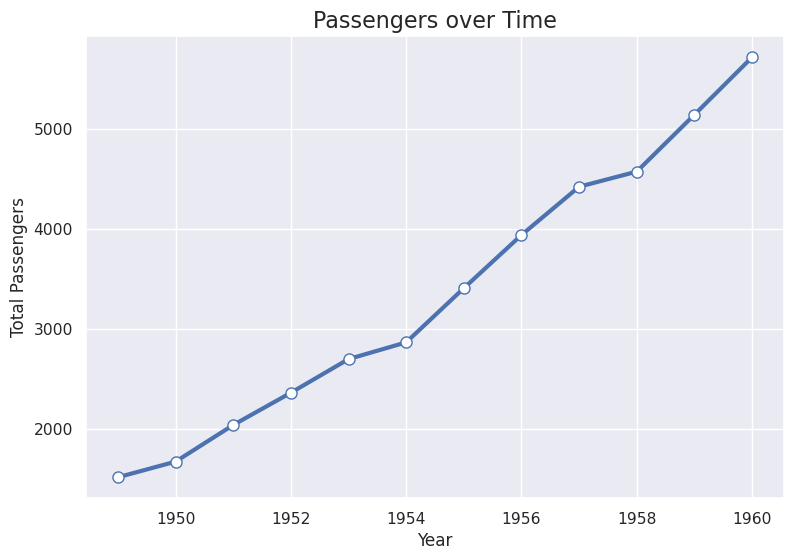

In [6]:
flights.groupby('year') \
    .passengers \
    .sum() \
    .plot(kind='line', 
          x='year', y='passengers',
          lw=3, c='b', marker='o', mfc='w', ms=8,
          title='Passengers over Time',
          xlabel='Year', ylabel='Total Passengers');

## Bar and Barh Plots

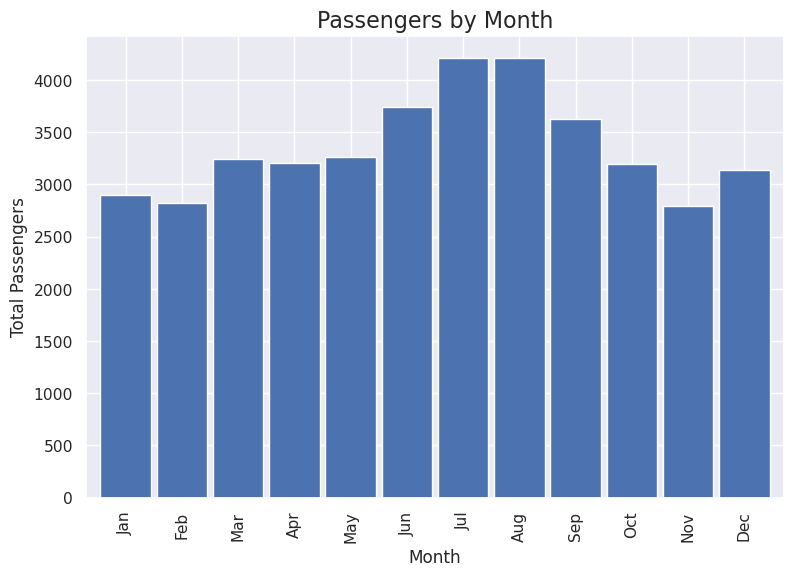

In [21]:
flights.groupby('month') \
    .passengers \
    .sum() \
    .plot(kind='bar', 
          x='month', y='passengers',
          width=.9,
          title='Passengers by Month',
          xlabel='Month', ylabel='Total Passengers');

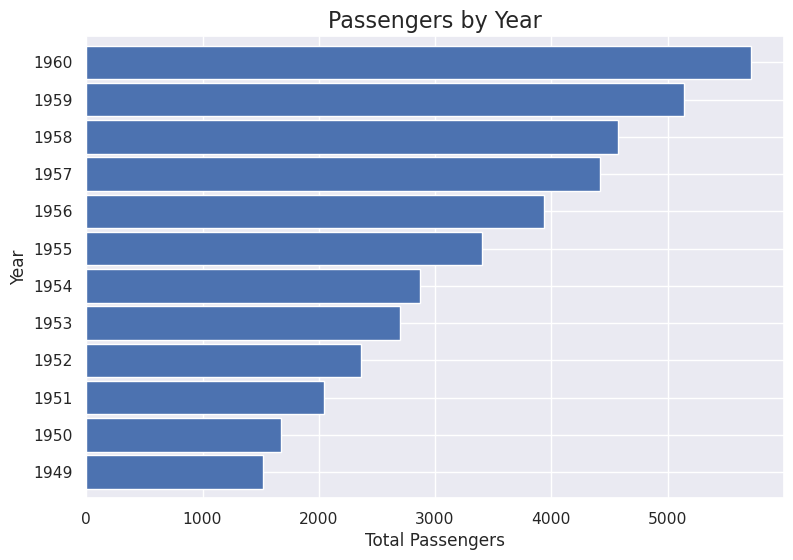

In [22]:
flights.groupby('year') \
    .passengers \
    .sum() \
    .plot(kind='barh', 
          y='year', x='passengers',
          width=.9,
          title='Passengers by Year',
          ylabel='Year', xlabel='Total Passengers');

## Histogram

In [23]:
iris = sns.load_dataset('iris')

In [24]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


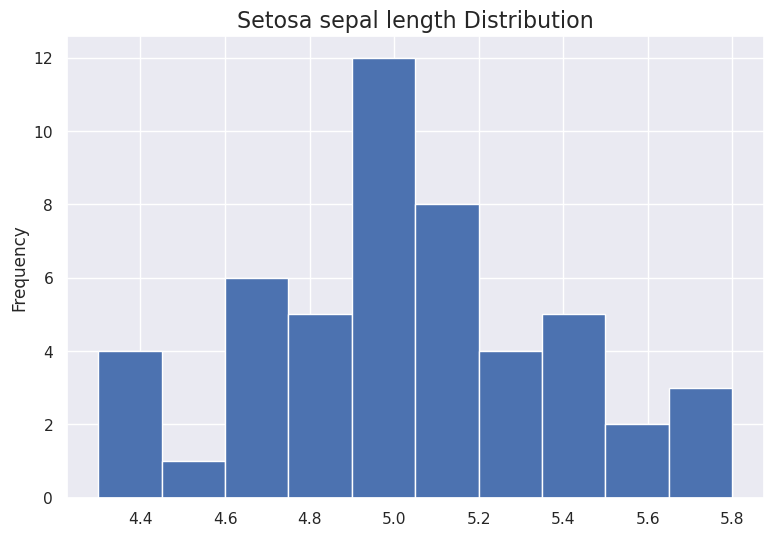

In [25]:
iris.query('species == "setosa"') \
    .sepal_length \
    .plot(kind='hist',
          bins=10,
          title='Setosa sepal length Distribution');

## Box Plot

In [26]:
tips = sns.load_dataset('tips')

In [27]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


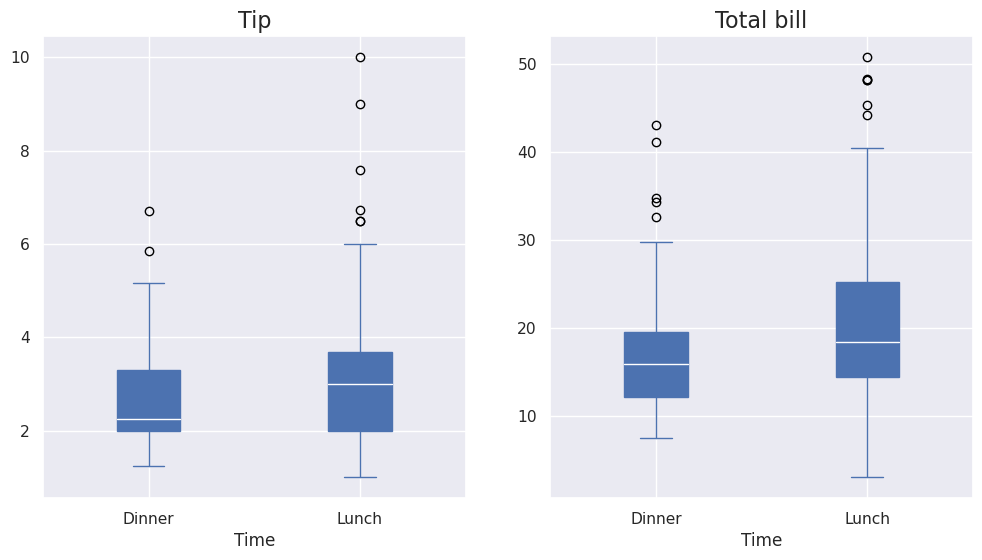

In [34]:
tips[['time', 'total_bill', 'tip']] \
    .rename(columns={'total_bill': 'Total bill', 'tip': 'Tip'}) \
    .plot(kind='box', by='time', 
          widths=0.3, figsize=(12,6),
          color={'boxes': 'b', 'medians': 'w'}, 
          patch_artist=True,
          xlabel='Time');

## Kde Plot

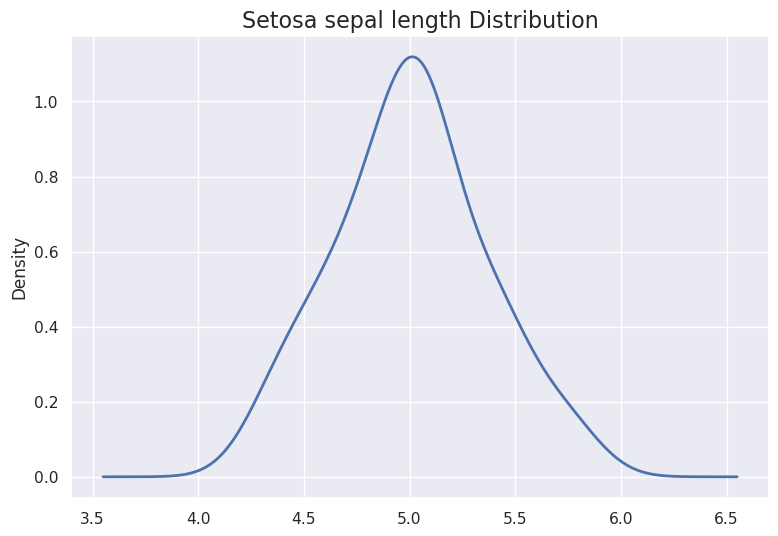

In [42]:
iris.query('species == "setosa"') \
    .sepal_length \
    .plot(kind='kde', lw=2,
          title='Setosa sepal length Distribution');

## Area Plot

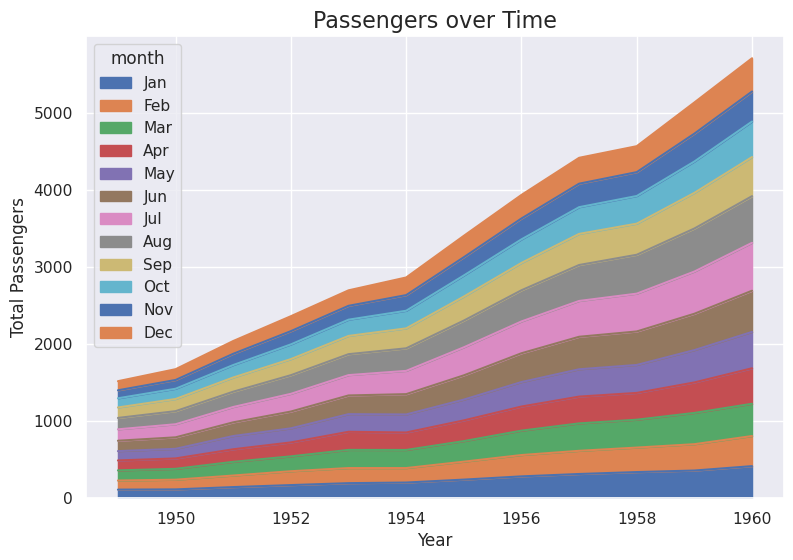

In [53]:
flights \
    .pivot_table(index='year', columns='month', values='passengers') \
    .plot(kind='area',
          title='Passengers over Time',
          xlabel='Year', ylabel='Total Passengers');

## Pie Plot

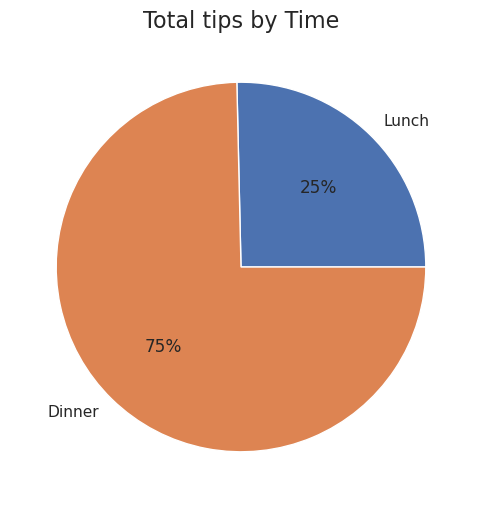

In [68]:
tips.groupby('time') \
    .tip \
    .sum() \
    .plot(kind='pie', autopct='%1.0f%%',
          title='Total tips by Time',
          ylabel='');

## Scatter Plot

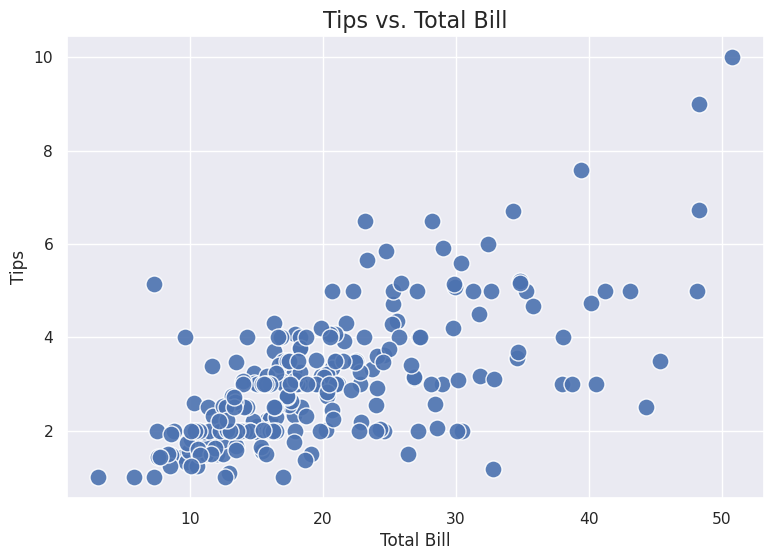

In [105]:
tips[['total_bill', 'tip']] \
    .plot(kind='scatter', x='total_bill', y='tip',
          s=150, edgecolors='w', alpha=0.9,
          title='Tips vs. Total Bill',
          xlabel='Total Bill', ylabel='Tips');

## Hexbin Plot

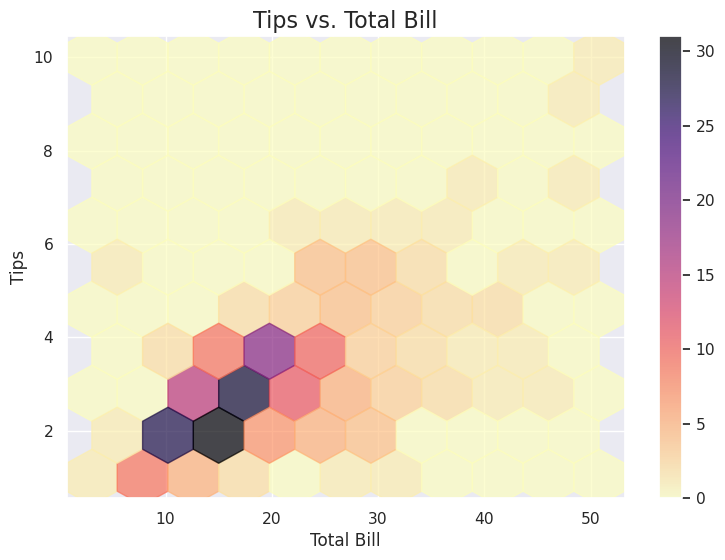

In [104]:
tips[['total_bill', 'tip']] \
    .plot(kind='hexbin', x='total_bill', y='tip',
          gridsize=10, cmap='magma_r', alpha=0.7,
          title='Tips vs. Total Bill',
          xlabel='Total Bill', ylabel='Tips');